In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv(r"C:\Users\Mayur23\Desktop\Prodigy Infotech\DS_TASK_02\train.csv")  
test = pd.read_csv(r"C:\Users\Mayur23\Desktop\Prodigy Infotech\DS_TASK_02\test.csv")   

In [38]:
print("\nTrain Dataset Info:")
print(train.info())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 87.1+ KB
None


In [19]:
print("\nTest Dataset Info:")
print(test.info())


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [20]:
print("\nTrain Dataset Head:")
print(train.head())


Train Dataset Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [21]:
print("\nMissing values in train dataset:")
print(train.isnull().sum())


Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [24]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [25]:
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

In [26]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [27]:
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

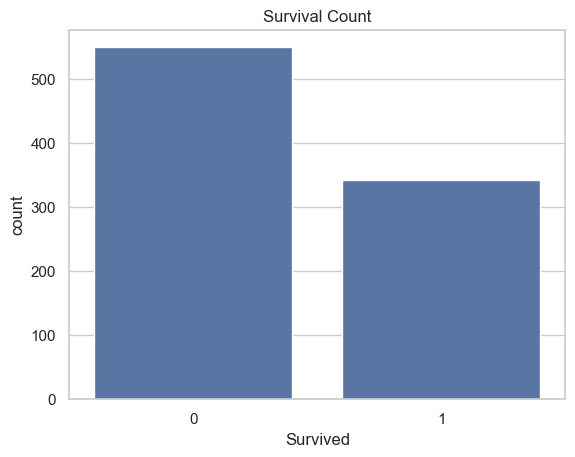

In [28]:
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()

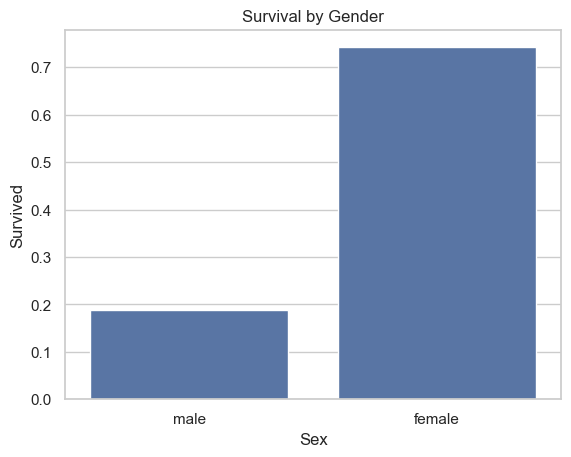

In [29]:
sns.barplot(data=train, x='Sex', y='Survived', errorbar=None)
plt.title('Survival by Gender')
plt.show()

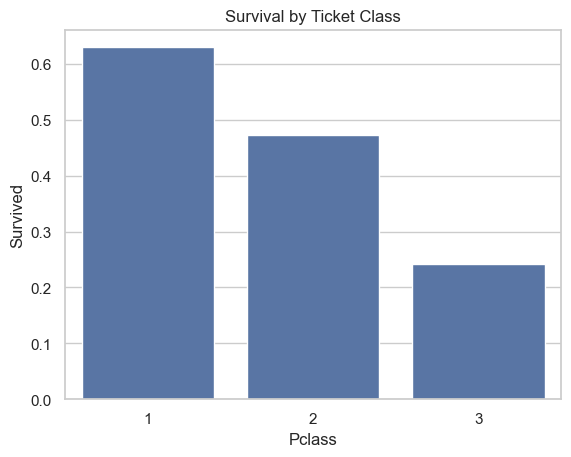

In [30]:
sns.barplot(data=train, x='Pclass', y='Survived', errorbar=None)
plt.title('Survival by Ticket Class')
plt.show()

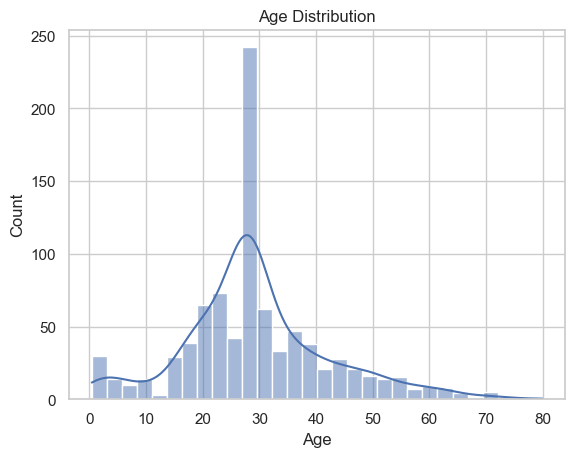

In [31]:
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

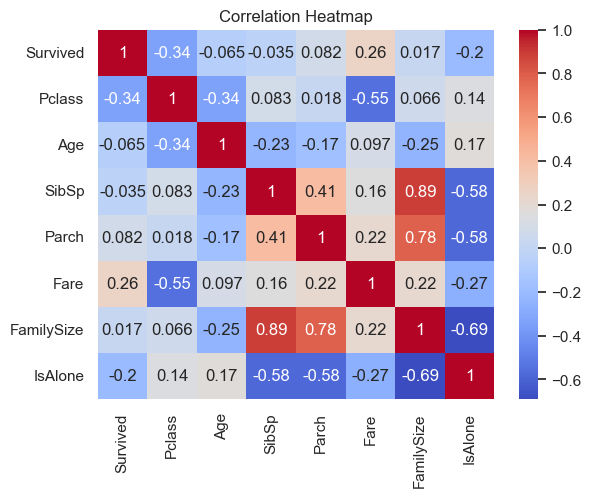

In [32]:
correlation = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

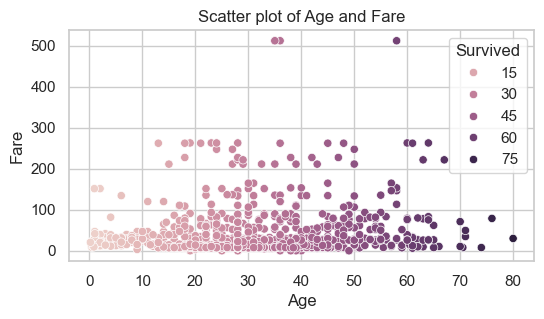

In [39]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()


In [33]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [34]:
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [35]:
X_train = train.drop(columns=['Survived', 'Name', 'Ticket'])
y_train = train['Survived']
X_test = test.drop(columns=['Name', 'Ticket'])

In [36]:
print("\nProcessed Train Features:")
print(X_train.head())
print("\nProcessed Test Features:")
print(X_test.head())


Processed Train Features:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1       3    0  22.0      1      0   7.2500         2   
1            2       1    1  38.0      1      0  71.2833         0   
2            3       3    1  26.0      0      0   7.9250         2   
3            4       1    1  35.0      1      0  53.1000         2   
4            5       3    0  35.0      0      0   8.0500         2   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1  

Processed Test Features:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          892       3    0  34.5      0      0   7.8292         1   
1          893       3    1  47.0      1      0   7.0000         2   
2          894       2    0  62.0      0      0   9.6875         1   
3          895       3    0  27.0      0      0   8.6625         2   
4          896       3    

In [37]:
X_train.to_csv('processed_train.csv', index=False)
X_test.to_csv('processed_test.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)